In [486]:
import pandas as pd
import matplotlib.pyplot as plt

# Load Data

In [334]:
df1 = pd.read_csv("Cab_Data.csv")
df2 = pd.read_csv("Customer_ID.csv")
df3 = pd.read_csv("Transaction_ID.csv")
df4 = pd.read_csv("City.csv")

df_23 = pd.merge(df2, df3, on=['Customer ID'])

df = pd.merge(df1, df_23, on=['Transaction ID'])
df = pd.merge(df, df4, on=["City"])


#drop duplicates if any
df.drop_duplicates(subset ="Transaction ID",
                     keep = False, inplace = True)
df.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Male,28,10813,Card,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Male,27,9237,Card,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Male,53,11242,Cash,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Male,23,23327,Cash,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Male,33,8536,Card,"814,885","24,701"
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.0240,27318,Male,25,13984,Cash,"814,885","24,701"
6,10000384,42371,Yellow Cab,ATLANTA GA,33.93,1341.17,464.1624,27602,Male,23,8542,Card,"814,885","24,701"
7,10000385,42378,Yellow Cab,ATLANTA GA,42.18,1412.06,516.2832,27594,Male,28,3901,Cash,"814,885","24,701"
8,10000386,42372,Yellow Cab,ATLANTA GA,10.60,364.62,132.2880,27884,Male,32,13505,Cash,"814,885","24,701"
9,10000387,42375,Yellow Cab,ATLANTA GA,26.75,838.00,333.8400,28533,Male,39,28386,Cash,"814,885","24,701"


# Comparing Profits Per Ride Between Two Companies

In [200]:
profit = df.groupby('Company')['Price Charged'].sum() - df.groupby('Company')['Cost of Trip'].sum()
customer = df.groupby('Company')['Customer ID'].count()
profit_per_customer = profit/customer
profit_df = {"Company":["Pink Cab", "Yellow Cab"], "Profit":[round(profit[0],2), round(profit[1],2)],
"Number of Rides": [customer[0],customer[1]], "Profit per Ride": [round(profit_per_customer[0],2),round(profit_per_customer[1],2)]}
profit_df = pd.DataFrame(profit_df)
print(profit_df)


      Company       Profit  Number of Rides  Profit per Ride
0    Pink Cab   5307328.32            84711            62.65
1  Yellow Cab  44020373.17           274681           160.26


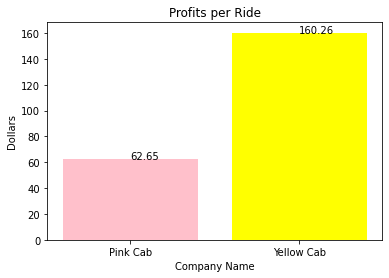

In [201]:
#bar plot for profit per ride
y = (62.65, 160.26)
plt.bar(profit_df["Company"], profit_df["Profit per Ride"], color=["pink", "yellow"])
plt.xlabel('Company Name')
plt.ylabel('Dollars')
plt.title('Profits per Ride')
for index, value in enumerate(y):
    plt.text(index, value, str(value))

plt.show()

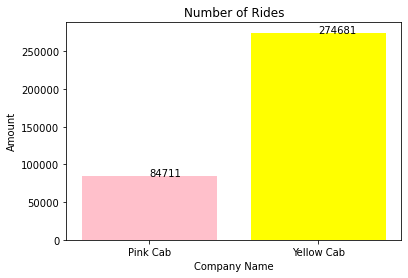

In [202]:
#barplot for rides
y = (84711, 274681)
plt.bar(profit_df["Company"], profit_df["Number of Rides"], color=["pink", "yellow"])
plt.xlabel('Company Name')
plt.ylabel('Amount')
plt.title("Number of Rides")
for index, value in enumerate(y):
    plt.text(index, value, str(value))

plt.show()

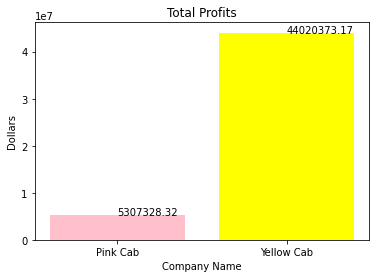

In [203]:
#barplot for profit
y = (5307328.32, 44020373.17)
plt.bar(profit_df["Company"], profit_df["Profit"], color=["pink", "yellow"])
plt.xlabel('Company Name')
plt.ylabel('Dollars')
plt.title("Total Profits")
for index, value in enumerate(y):
    plt.text(index, value, str(value))

plt.show()

# Profit Per City Between Two Companies

              City  Profit Per Ride  Profit Percentage
0       ATLANTA GA        54.511961           1.809763
1        AUSTIN TX        78.932168           2.778145
2        BOSTON MA        50.520960           4.936602
3       CHICAGO IL        34.047910           6.005328
4        DALLAS TX        17.920371           0.465962
5        DENVER CO        29.114016           0.764696
6   LOS ANGELES CA        56.669120          21.210899
7         MIAMI FL        81.069526           3.058058
8     NASHVILLE TN        34.918269           1.211241
9      NEW YORK NY       108.217540          28.479007
10   ORANGE COUNTY        67.412976           1.921792
11      PHOENIX AZ        41.199530           0.670703
12   PITTSBURGH PA        25.084660           0.322342
13   SACRAMENTO CA        41.472273           1.042408
14    SAN DIEGO CA        59.772280          12.019037
15      SEATTLE WA        41.281601           2.125011
16  SILICON VALLEY        89.610358           6.410957
17       T

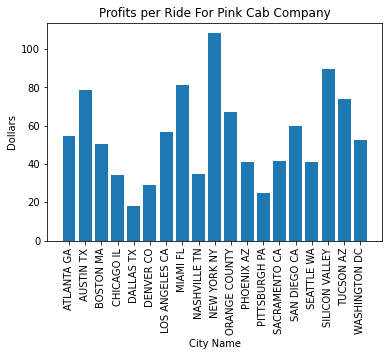

In [204]:
profit_by_city = df.groupby(['Company', 'City'])['Price Charged'].sum() - df.groupby(['Company','City'])['Cost of Trip'].sum()
ride_by_city = df.groupby(['Company','City'])['Customer ID'].count()
profit_per_ride_by_city = profit_by_city/ride_by_city

city=[]
for x in df["City"]:
    if x not in city:
        city.append(x)

profit_percentage = profit_by_city["Pink Cab"].tolist()/profit["Pink Cab"] * 100.00
profit_pink_df = {"City":city, "Profit Per Ride":profit_per_ride_by_city["Pink Cab"].tolist(), "Profit Percentage": profit_percentage}
profit_pink_df = pd.DataFrame(profit_pink_df)
print(profit_pink_df)


plt.bar(profit_pink_df["City"], profit_pink_df["Profit Per Ride"])
plt.xticks(rotation=90)
plt.xlabel('City Name')
plt.ylabel('Dollars')
plt.title("Profits per Ride For Pink Cab Company")

plt.show()


              City  Profit Per Ride  Profit Percentage
0       ATLANTA GA       128.797723           1.695539
1        AUSTIN TX       125.249582           0.861546
2        BOSTON MA        61.483619           3.422773
3       CHICAGO IL        64.924486           6.970843
4        DALLAS TX       195.849415           2.507937
5        DENVER CO       146.853175           0.810988
6   LOS ANGELES CA       116.656368           7.464672
7         MIAMI FL       133.872429           1.353919
8     NASHVILLE TN        72.923597           0.193655
9      NEW YORK NY       307.864252          60.088270
10   ORANGE COUNTY       143.785355           0.806459
11      PHOENIX AZ       131.120407           0.357436
12   PITTSBURGH PA       107.857716           0.154606
13   SACRAMENTO CA        60.021471           0.140849
14    SAN DIEGO CA        96.706775           2.156442
15      SEATTLE WA        93.428968           1.117445
16  SILICON VALLEY       206.788383           2.218188
17       T

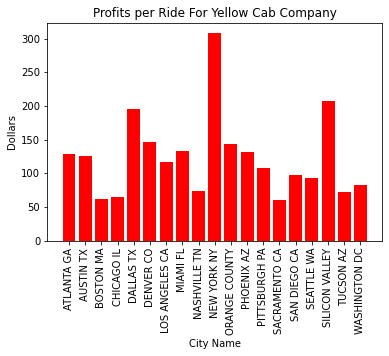

In [205]:

profit_percentage = profit_by_city["Yellow Cab"].tolist()/profit["Yellow Cab"] * 100.00
profit_yellow_df = {"City":city, "Profit Per Ride":profit_per_ride_by_city["Yellow Cab"].tolist(), "Profit Percentage":profit_percentage}
profit_yellow_df = pd.DataFrame(profit_yellow_df)
print(profit_yellow_df)


plt.bar(profit_yellow_df["City"], profit_yellow_df["Profit Per Ride"], color="red")
plt.xticks(rotation=90)
plt.xlabel('City Name')
plt.ylabel('Dollars')
plt.title("Profits per Ride For Yellow Cab Company")

plt.show()

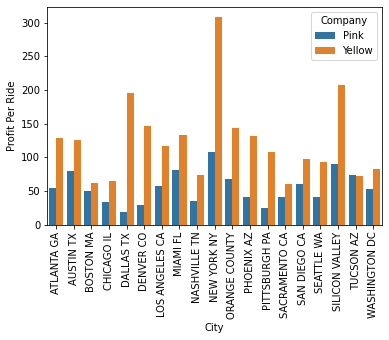

In [206]:
import seaborn as sns
profit_pink_df['Company']="Pink"
profit_yellow_df['Company']="Yellow"
res = pd.concat([profit_pink_df, profit_yellow_df])
sns.barplot(x='City', y='Profit Per Ride', data=res, hue='Company')
plt.xticks(rotation=90)
plt.show()

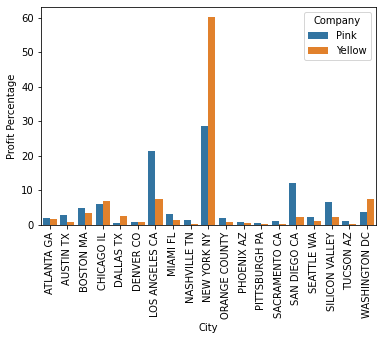

In [95]:
#might want to look at the profit percentage of each city
profit_pink_df['Company']="Pink"
profit_yellow_df['Company']="Yellow"
res = pd.concat([profit_pink_df, profit_yellow_df])
sns.barplot(x='City', y='Profit Percentage', data=res, hue='Company')
plt.xticks(rotation=90)
plt.show()

# Costs and Profits

 try to get to know if the costs for yellow cab company is relatively higher


 if the costs for yellow cab company is higher, probably explain why they charged more

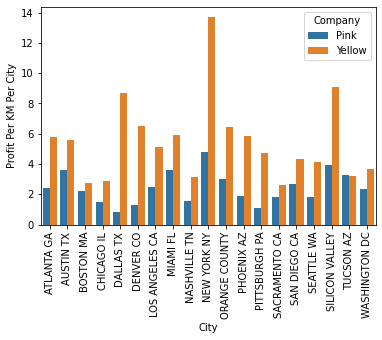

In [346]:
#cost per km by city
cost = df.groupby(["Company","City"])["Cost of Trip"].sum()/df.groupby(["Company","City"])["KM Travelled"].sum()
profit = (df.groupby(["Company", "City"])["Price Charged"].sum()- df.groupby(["Company","City"])["Cost of Trip"].sum())/df.groupby(["Company","City"])["KM Travelled"].sum()

city=[]
for x in df["City"]:
    if x not in city:
        city.append(x)

profit_pink_df = {"City":city, "Profit Per KM Per City":profit["Pink Cab"].tolist(), "Cost Per KM Per City": cost["Pink Cab"].tolist()}
profit_pink_df = pd.DataFrame(profit_pink_df)

profit_yellow_df = {"City":city, "Profit Per KM Per City":profit["Yellow Cab"].tolist(), "Cost Per KM Per City": cost["Yellow Cab"].tolist()}
profit_yellow_df = pd.DataFrame(profit_yellow_df)

profit_pink_df['Company']="Pink"
profit_yellow_df['Company']="Yellow"
res = pd.concat([profit_pink_df, profit_yellow_df])
sns.barplot(x='City', y='Profit Per KM Per City', data=res, hue='Company')
plt.xticks(rotation=90)
plt.show()



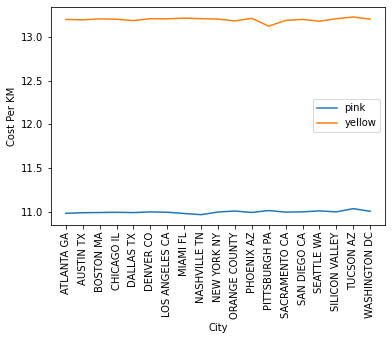

In [351]:

x1=profit_pink_df["City"].tolist()
y1=profit_pink_df["Cost Per KM Per City"].tolist()
plt.plot(x1, y1, label = "pink")

x2 = profit_yellow_df["City"].tolist()
y2 = profit_yellow_df["Cost Per KM Per City"].tolist()
plt.plot(x2,y2, label="yellow")
plt.xlabel("City")
plt.ylabel("Cost Per KM")
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
#change the random number to year (excluding months and dates )
#overlook
#each year has 365 days
dff = df.sort_values(by="Date of Travel")

for i in range(len(dff["Date of Travel"])):
    if 42371<=dff["Date of Travel"][i] <= 42734 :
        dff["Date of Travel"][i] = 2016 
    elif 42734 < dff["Date of Travel"][i] < 43100:
        dff["Date of Travel"][i] = 2017
    else:
        dff["Date of Travel"][i] = 2018



<AxesSubplot:xlabel='Year'>

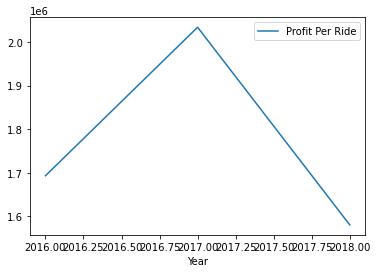

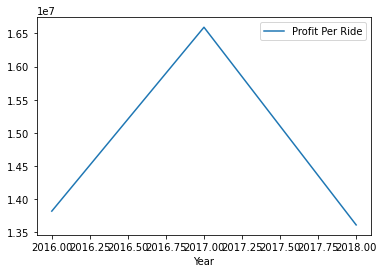

In [191]:
#growth per year
year = [2016, 2017, 2018]
profit_by_year = dff.groupby(["Company","Date of Travel"])["Price Charged"].sum() - dff.groupby(["Company","Date of Travel"])["Cost of Trip"].sum()
profit_pink_df = {"Year":year, "Profit Per Ride":profit_by_year["Pink Cab"].tolist()}
profit_pink_df = pd.DataFrame(profit_pink_df)

profit_yellow_df = {"Year":year, "Profit Per Ride":profit_by_year["Yellow Cab"].tolist()}
profit_yellow_df = pd.DataFrame(profit_yellow_df)

profit_pink_df.plot(x="Year", y ="Profit Per Ride")
profit_yellow_df.plot(x="Year", y ="Profit Per Ride")



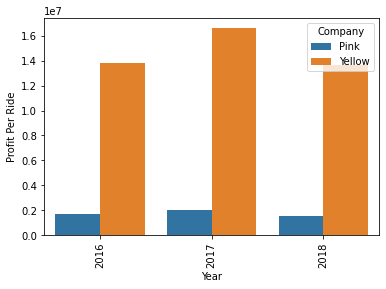

In [180]:
profit_pink_df['Company']="Pink"
profit_yellow_df['Company']="Yellow"
res = pd.concat([profit_pink_df, profit_yellow_df])
sns.barplot(x='Year', y='Profit Per Ride', data=res, hue='Company')
plt.xticks(rotation=90)
plt.show()

In [353]:
# look at differences in months and forecasts
# generate time range
import datetime
start = datetime.datetime.strptime("2016-01-01", "%Y-%m-%d")
end = datetime.datetime.strptime("2018-12-31", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]
time = []
for date in date_generated:
    time.append(date.strftime("%Y-%m-%d"))
len(time)


1095

In [424]:
#get the number in date of travel
date = []
for x in df["Date of Travel"]:
    if x not in date:
        date.append(x)
date.sort()


In [425]:
#combine into a dataframe
d= {"Date of Travel":date, "Date": time}
d = pd.DataFrame(d)

In [426]:
#merge the dataframe and replace it with readable date
dff = pd.merge(d, df, on=['Date of Travel'])
#drop the date of travel
dff = dff.drop("Date of Travel", axis =1 )


In [427]:

profit = dff.groupby(["Company", "Date"])["Price Charged"].sum() - dff.groupby(["Company","Date"])["Cost of Trip"].sum()
profit_pink_df = {"Year":time, "Profit":profit["Pink Cab"].tolist()}
profit_pink_df = pd.DataFrame(profit_pink_df)

profit_yellow_df = {"Year":time, "Profit":profit["Yellow Cab"].tolist()}
profit_yellow_df = pd.DataFrame(profit_yellow_df)

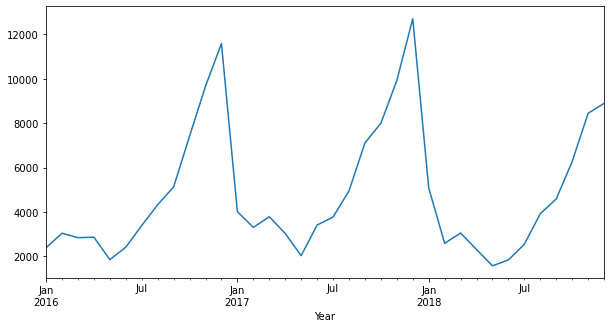

In [428]:
#Pink Cab Forecast
profit_pink_df["Year"]=pd.to_datetime(profit_pink_df["Year"])
profit_index = profit_pink_df.set_index("Year")
#using the start of each month
y = profit_index["Profit"].resample('MS').mean()
y.plot(figsize=(10,5))
plt.show()

In [430]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

#for param in pdq:
#    for param_seasonal in seasonal_pdq:
#        try:
#            mod = sm.tsa.statespace.SARIMAX(y,
#                                            order=param,
#                                            seasonal_order=param_seasonal,
#                                            enforce_stationarity=False,
#                                            enforce_invertibility=False)
#            results = mod.fit()
#            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#        except:
#            continue

#suggests ARIMA(1, 1, 1)x(1, 1, 1, 12) has the lowest AIC value 145.49


/Users/chenzhiyi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


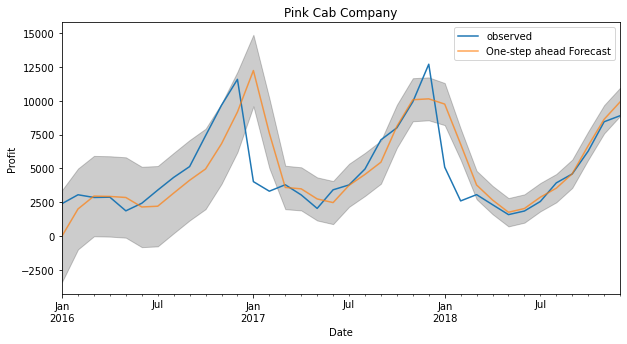

In [436]:
#fit the model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
ax.set_title("Pink Cab Company")
plt.legend()
plt.show()

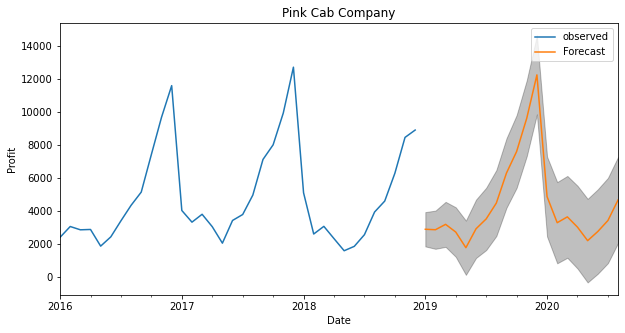

In [437]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
ax.set_title("Pink Cab Company")
plt.legend()
plt.show()

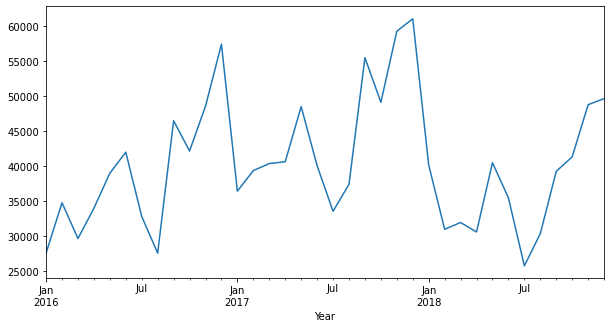

In [442]:
#Yellow Cab Forecast
profit_yellow_df["Year"]=pd.to_datetime(profit_yellow_df["Year"])
profit_index = profit_yellow_df.set_index("Year")
#using the start of each month
y= profit_index["Profit"].resample('MS').mean()

y.plot(figsize=(10,5))
plt.show()


/Users/chenzhiyi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


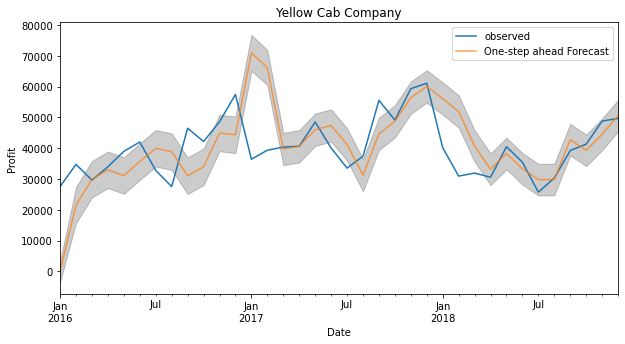

In [443]:
#fit the model
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()




pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 5))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
ax.set_title("Yellow Cab Company")
plt.legend()
plt.show()

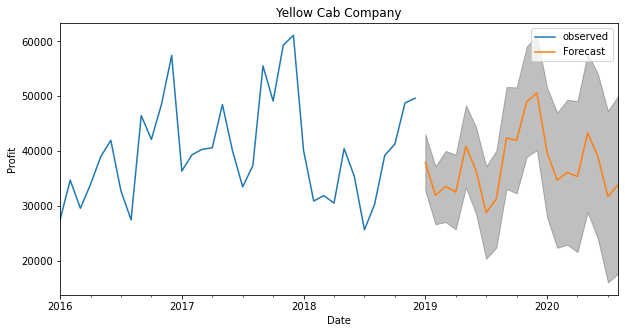

In [444]:
pred_uc = results.get_forecast(steps=20)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(10, 5))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Profit')
ax.set_title("Yellow Cab Company")
plt.legend()
plt.show()

# Customer Analysis

In [457]:
#Customer Analysis
profit = dff["Price Charged"]-dff["Cost of Trip"]
dff["Profit"]= profit

dff["Date"] = pd.to_datetime(dff["Date"], format='%Y-%m-%d')
customer = dff.groupby(["Company", "Date"])["Profit"].count()
profit = dff.groupby(["Company","Date"])["Profit"].sum()
km = dff.groupby(["Company", "Date"])["KM Travelled"].sum()/dff.groupby(["Company", "Date"])["KM Travelled"].count()
age = dff.groupby(["Company", "Date"])["Age"].sum()/dff.groupby(["Company","Date"])["Age"].count()
income = dff.groupby(["Company","Date"])["Income (USD/Month)"].sum()/dff.groupby(["Company","Date"])["Income (USD/Month)"].count()

#pink cab
pink_df = {"Company": "Pink", "Date":time, "Customer":customer["Pink Cab"].tolist(), "Profit": profit["Pink Cab"].tolist(),"Average KM Travelled": km["Pink Cab"].tolist(),
"Average Age": age["Pink Cab"].tolist(), "Average Income": income["Pink Cab"].tolist()}
pink_df = pd.DataFrame(pink_df)

#yellow cab
yellow_df = {"Company":"Yellow", "Date":time, "Customer":customer["Yellow Cab"].tolist(), "Profit": profit["Yellow Cab"].tolist(),"Average KM Travelled": km["Yellow Cab"].tolist(),
"Average Age": age["Yellow Cab"].tolist(), "Average Income": income["Yellow Cab"].tolist()}
yellow_df = pd.DataFrame(yellow_df)

df_ana = pd.concat([pink_df, yellow_df])

In [408]:
#data transformation
#transform Pink Cab company to 0 and Yellow Cab Company to 1
df_ana['Company'] = df_ana['Company'].map({'Pink': 0, 'Yellow': 1})
#target variable profit
y=df_ana["Profit"]
#predictors
X = df_ana.drop(["Date","Profit"], axis=1)

In [420]:
import numpy as np
# Scikit learn models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor

# Cross-validation helpers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

#grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline


In [417]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     4147.
Date:                Sat, 14 May 2022   Prob (F-statistic):               0.00
Time:                        17:46:02   Log-Likelihood:                -23023.
No. Observations:                2190   AIC:                         4.606e+04
Df Residuals:                    2184   BIC:                         4.609e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.542e+04 

In [414]:
# Set up basic simulation parameters
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction
#linear regression
lr = LinearRegression()
shuffle = ShuffleSplit(n_splits = nmc, test_size = testSize)
CVInfo = cross_validate(lr, X, y, cv=shuffle, return_train_score = True)
print("Train Score:", np.mean(CVInfo['train_score']))
print("Test Score:", np.mean(CVInfo["test_score"]))


Train Score: 0.9048311135797686
Test Score: 0.9033626431616096


In [421]:
#ridge regression

alphas= np.arange(start=0.1, stop=3.0, step=0.1)

fullModel = Pipeline([
    ("scaler", MinMaxScaler()),
    ("ridge", Ridge())
])
#set up dictionary for grid search
param_grid={'ridge__alpha':alphas}
#same as the shuffle but different name for grid_search
cvf = ShuffleSplit(test_size=testSize, n_splits=nmc)
#set up search
grid_search = GridSearchCV(fullModel, param_grid,cv=cvf,return_train_score=True)
#implement search with fit
grid_search.fit(X, y)
#import pandas to move results into dataframe
results = pd.DataFrame(grid_search.cv_results_)
print(results[['rank_test_score','mean_test_score','param_ridge__alpha']])

# Print best params and model
print("best param:",grid_search.best_params_)
print("best model:",grid_search.best_estimator_)
print("best test score:",grid_search.best_score_)

# This is best model
best_model = grid_search.best_estimator_

# Rerun cross validation for this model just to check
CVInfo = cross_validate(best_model, X, y, cv=cvf,return_train_score=True,n_jobs=-1)

print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))
    

    rank_test_score  mean_test_score param_ridge__alpha
0                 1         0.902825                0.1
1                 2         0.902668                0.2
2                 3         0.902466                0.3
3                 4         0.902223                0.4
4                 5         0.901939                0.5
5                 6         0.901617                0.6
6                 7         0.901258                0.7
7                 8         0.900865                0.8
8                 9         0.900439                0.9
9                10         0.899981                  1
10               11         0.899493                1.1
11               12         0.898977                1.2
12               13         0.898433                1.3
13               14         0.897863                1.4
14               15         0.897269                1.5
15               16         0.896651                1.6
16               17         0.896011            

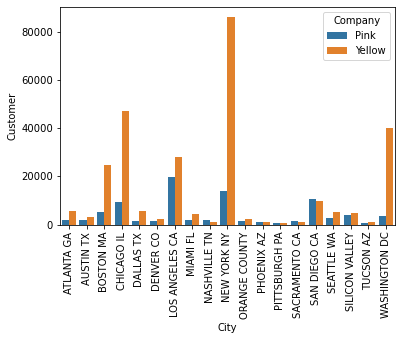

In [472]:
#Customers per city
city=[]
for x in df["City"]:
    if x not in city:
        city.append(x)

customer = dff.groupby(["Company", "City"])["City"].count()
pink_df = {"City":city, "Customer":customer["Pink Cab"].tolist()}
pink_df = pd.DataFrame(pink_df)

yellow_df = {"City":city, "Customer": customer["Yellow Cab"].tolist()}
yellow_df = pd.DataFrame(yellow_df)

pink_df['Company']="Pink"
yellow_df['Company']="Yellow"
res = pd.concat([pink_df, yellow_df])
sns.barplot(x='City', y='Customer', data=res, hue='Company')
plt.xticks(rotation=90)
plt.show()


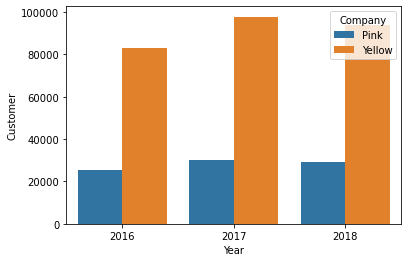

In [489]:
#customer base by year
customer_base = dff.groupby(["Company", dff["Date"].dt.year])["City"].count()
year = [2016, 2017, 2018]
pink_df = {"Year":year, "Customer":customer_base["Pink Cab"].tolist()}
pink_df = pd.DataFrame(pink_df)

yellow_df = {"Year":year, "Customer": customer_base["Yellow Cab"].tolist()}
yellow_df = pd.DataFrame(yellow_df)

pink_df['Company']="Pink"
yellow_df['Company']="Yellow"
res = pd.concat([pink_df, yellow_df])
sns.barplot(x='Year', y='Customer', data=res, hue='Company',errwidth=0)

    
plt.show()


# Recommendations

Yellow Cab Company obviously gains more profit compared to Pink Cab Company, even though Yellow Cab Company shows a decreasing trend in the future two years, the pattern is relatively stable compared to the fluctuation of Pink Cab Company. However, the costs per kilometer traveled for Yellow Cab Company is higher than Pink Cab Company, but the detailed number is not provided, so the purposes of the costs are not examined. Even though the costs are high, the profits will cover these costs. Yellow Cab Company mainly earns its profits in New York, and Pink Cab Company mainly earns its profits in Los Angeles and San Diego. However, Yellow Cab Company shows more customers in most of the areas except for San Diego. Moreover, the regression analysis indicates more customers lead to more profits, and Yellow Cab Company has more customers over year compared to Pink Cab Company. Therefore, I would recommend XYZ company to invest in the Yellow Cab Company in general for more profits. If XYZ company wants to make investments area wise, I would recommend XYZ company to invest in the Yellow Cab Company if they want to mainly focus on New York, and if they want to put more effort in Los Angeles or San Diego, I would probably recommend them to invest in the Pink Cab Company.